In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import chi2
from sampler.gibbs import univariatenormal as gibbs
from sampler.metropolis import metropolis as metro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


J = 2
np.random.seed(0)
mu = np.array([2,1])
Sigma = np.array([[1,-0.8],[-0.8,1]])
V,eigenval,Vt = np.linalg.svd(Sigma)
Gamma = np.dot(V,np.diag(eigenval**(1/2)))/2
Gamma_inv = np.linalg.inv(Gamma)


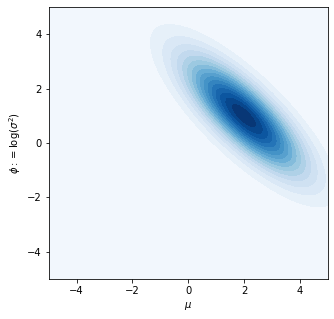

In [3]:
def logdensity_MVN(Y,mu,Gamma_inv=np.eye(2)):
    if len(np.shape(Y))==1:
        Y = Y[None,:]
        pass
    N = np.shape(Y)[0]
    Yc = Y-mu[None,:]
    X = np.dot(Yc,Gamma_inv.T)
    logdens =  -1/2*( np.sum(X**2,axis=1) )
    logdens = np.array(logdens)
    return logdens

LLfun = lambda z: logdensity_MVN(z,mu,Gamma_inv)

nGrid =1001
limit = 5
x_min = -limit
y_min = -limit
x_max = +limit
y_max = +limit
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nGrid),np.linspace(y_min, y_max, nGrid))
xx0, yy0 = np.meshgrid(np.linspace(-x_max, x_max, nGrid),np.linspace(-y_max, y_max, nGrid))

Z_mesh = np.c_[xx.ravel(), yy.ravel()]
Y_mesh = np.c_[xx0.ravel(), yy0.ravel()]
logdens_mesh = np.reshape(LLfun(Z_mesh),np.shape(xx))

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

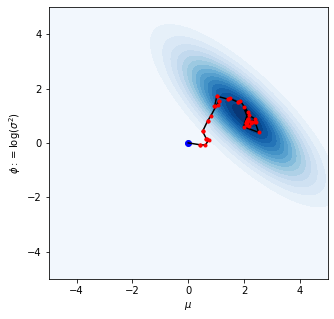

In [4]:
S = 50
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);

gamma = 0.25
theta0 = np.zeros(2)

np.random.seed(11)
metro(LLfun,S,theta0,gamma,ax=ax)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

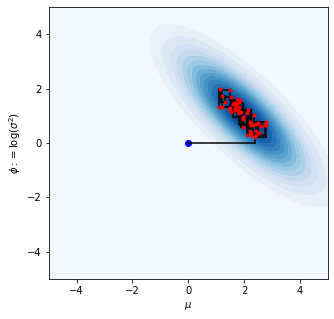

In [5]:
from sampler.slice import conditionalslice as slicer

S = 50
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);

gamma = 0.25
theta0 = np.zeros(2)
m = 10 ;
p = 8 ;
mode = 'double'
adapt=0

np.random.seed(11)
slicer(LLfun,S,theta0,mode,m,p,gamma,adapt=0,ax=ax)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

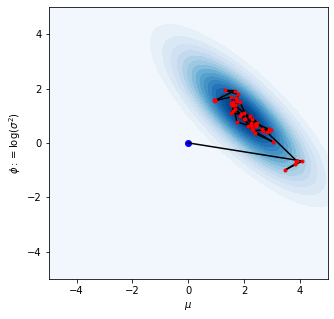

In [6]:
from sampler.slice import hitandrunslice as hitslicer

S = 50
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);

gamma = 0.25
theta0 = np.zeros(2)
m = 10 ;
p = 8 ;
mode = 'double'
adapt=0

np.random.seed(11)
hitslicer(LLfun,S,theta0,mode,m,p,gamma,adapt=0,ax=ax)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

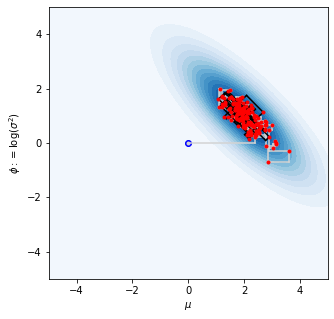

In [7]:
from sampler.slice import conditionalslice as slicer

S = 150
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);

gamma = 0.25
theta0 = np.zeros(2)
m = 10 ;
p = 8 ;
mode = 'double'
adapt=0

np.random.seed(11)
slicer(LLfun,S,theta0,mode,m,p,gamma,adapt=50,ax=ax)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

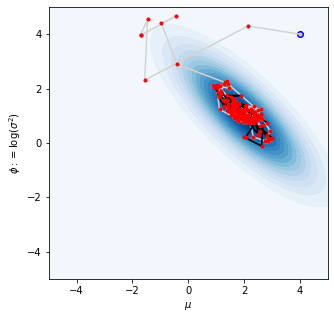

In [8]:
from sampler.slice import hitandrunslice as hitslicer

S = 150
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.contourf(xx, yy,  (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);

gamma = 0.25
theta0 = np.ones(2)*4
m = 10 ;
p = 8 ;
mode = 'double'
adapt=0

np.random.seed(11)
hitslicer(LLfun,S,theta0,mode,m,p,gamma,adapt=50,ax=ax)

ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$');

In [9]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

pandas2ri.activate()

mcmcse = importr('mcmcse')
robjects.r('''
        # create a function `mESS`
        mESS <- function(X, verbose=FALSE) {
            if (verbose) {
                cat("I am calling mESS().\n")
            }
            multiESS(as.data.frame(X))
        }
        ''')
r_mESS = robjects.globalenv['mESS']


C:\Users\2kv\.conda\envs\data_science\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [10]:
burnin = 2000
S = 10000

loggammas = np.arange(-4,4.1)
gammas = 2**loggammas
G = len(gammas)
methods = ['Metropolis','Slice','Slice - Adapt','Hit','Hit - Adapt']

M = len(methods)    
ComputeTime = np.ones([G,M])*np.nan
ESS = np.ones([G,M])*np.nan
ZZ = []
for iScale in range(G):
    gamma = gammas[iScale]
    print(gamma)
    for iMethod in range(M):
        method = methods[iMethod]
        #print(gamma,method)
        xComplete = False
        seed = 0
        while not(xComplete):
            #print(gamma,method,seed)
            try:
                np.random.seed(seed)
                tic = time.perf_counter()
                if method=='Metropolis':
                    Z = np.array(metro(LLfun,S,theta0,gamma) )
                    pass
                elif method=='Slice':
                    Z = np.array(slicer(LLfun,S,theta0,mode,m,p,gamma,adapt=0));
                    pass
                elif method=='Slice - Adapt':
                    Z = np.array(slicer(LLfun,S,theta0,mode,m,p,gamma,adapt=int(burnin/2)));
                    pass
                elif method=='Hit':
                    Z = np.array(hitslicer(LLfun,S,theta0,mode,m,p,gamma,adapt=0));
                    pass
                elif method=='Hit - Adapt':
                    Z = np.array(hitslicer(LLfun,S,theta0,mode,m,p,gamma,adapt=int(burnin/2)));
                    pass
                toc = time.perf_counter()
                ess = r_mESS(Z[burnin:,:])[0]
                xComplete = True
                pass
            except:
                seed +=1
            pass
        ComputeTime[iScale,iMethod] = toc-tic
        ESS[iScale,iMethod] = ess
        if gamma==1:
            ZZ.append(Z)
            pass
        pass
    pass

0.0625
0.125
0.25
0.5
1.0
2.0
4.0
8.0
16.0


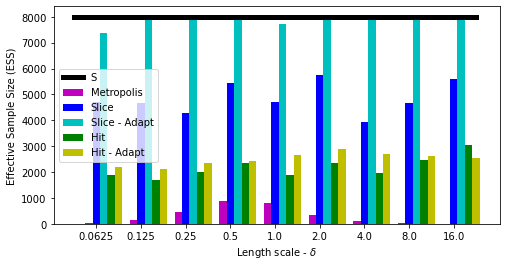

In [11]:
colors = ['m','b','c','g','y'] 
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(np.array([loggammas[0]-1/2,loggammas[-1]+1/2,]),np.array([S-burnin,S-burnin]),'k-',lw=5,label='S')
#ax.plot(np.array([loggammas[0]-1/2,loggammas[-1]+1/2,]),np.array([ess_Gibbs,ess_Gibbs]),'r--',lw=3,label='Gibbs')
for iMethod in range(M):
    method = methods[iMethod]
    ax.bar(x=loggammas+(iMethod-1)/6,height=ESS[:,iMethod],label=method, width=1/6, color =colors[iMethod])
    pass
ax.set_xlabel('Length scale - $\delta$')
ax.set_ylabel('Effective Sample Size (ESS)')
ax.set_xticks(loggammas)
ax.set_xticklabels(gammas)
ax.legend();

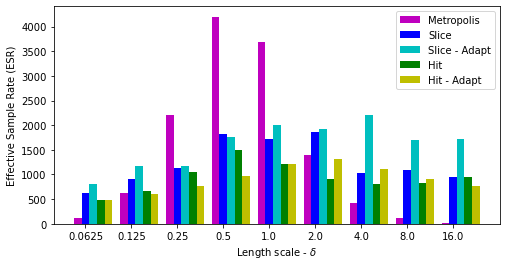

In [12]:
ESR = ESS/(S-burnin)*S/ComputeTime
#ESR_Gibbs = ess_Gibbs/(S-burnin)*S/ComputeTime_Gibbs

fig, ax = plt.subplots(1,1,figsize=(8,4))
#ax.plot(np.array([loggammas[0]-1/2,loggammas[-1]+1/2,]),np.array([ESR_Gibbs,ESR_Gibbs]),'r--',lw=3,label='Gibbs')
for iMethod in range(M):
    method = methods[iMethod]
    ax.bar(x=loggammas+(iMethod-1)/6,height=ESR[:,iMethod],label=method, width=1/6, color =colors[iMethod])
    pass
ax.set_xlabel('Length scale - $\delta$')
ax.set_ylabel('Effective Sample Rate (ESR)')
ax.set_xticks(loggammas)
ax.set_xticklabels(gammas)
ax.legend();

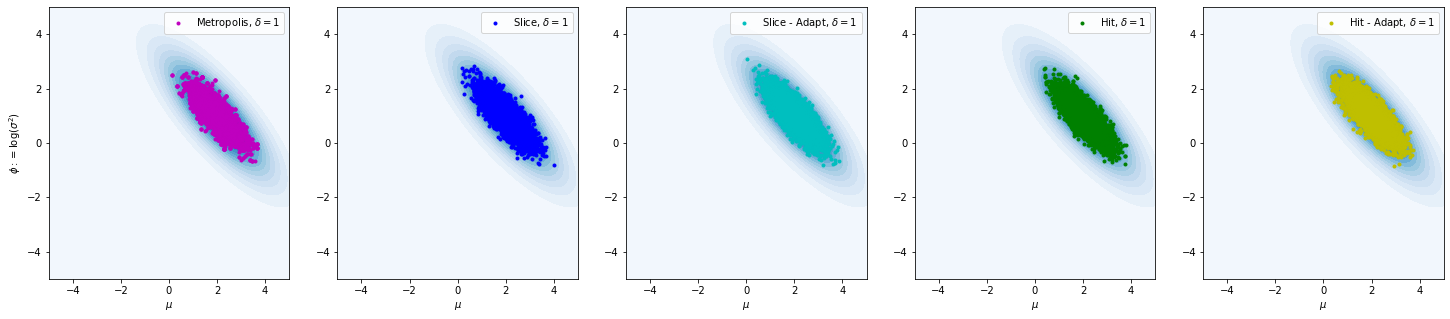

In [13]:
fig, axs = plt.subplots(1,5,figsize=(25,5))

ax = axs[0]
ax.contourf(xx, yy, (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.plot(ZZ[0][burnin:,0],ZZ[0][burnin:,1],'.',color=colors[0],label=methods[0]+', $\delta=1$')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\phi := \log(\sigma^2)$')
ax.legend()

ax = axs[1]
ax.contourf(xx, yy, (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.plot(ZZ[1][burnin:,0],ZZ[1][burnin:,1],'.',color=colors[1],label=methods[1]+', $\delta=1$')
ax.set_xlabel('$\mu$')
ax.legend();

ax = axs[2]
ax.contourf(xx, yy, (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.plot(ZZ[2][burnin:,0],ZZ[2][burnin:,1],'.',color=colors[2],label=methods[2]+', $\delta=1$')
ax.set_xlabel('$\mu$')
ax.legend();

ax = axs[3]
ax.contourf(xx, yy, (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.plot(ZZ[3][burnin:,0],ZZ[3][burnin:,1],'.',color=colors[3],label=methods[3]+', $\delta=1$')
ax.set_xlabel('$\mu$')
ax.legend();

ax = axs[4]
ax.contourf(xx, yy, (np.exp(logdens_mesh))**(1/8), cmap='Blues', alpha=1,levels=17);
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.plot(ZZ[4][burnin:,0],ZZ[4][burnin:,1],'.',color=colors[4],label=methods[4]+', $\delta=1$')
ax.set_xlabel('$\mu$')
ax.legend();